<a href="https://colab.research.google.com/github/VihaanS22/API-/blob/main/Copy_of_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

In [ ]:
X,y = fetch_openml('mnist_784',version=1,return_X_y=True)
X = np.array(X)
print(pd.Series(y).value_counts())

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64


In [ ]:
classes = ['0','1','2','3','4','5','6','7','8','9']
nclasses = len(classes)

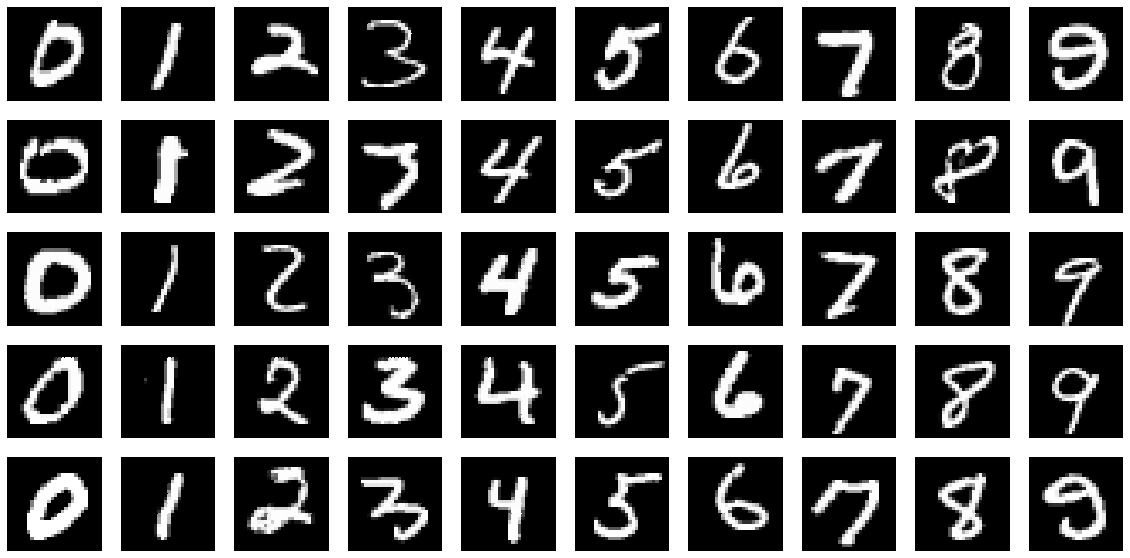

In [ ]:
sample_size = 5

figure = plt.figure(figsize=(nclasses*2,sample_size*2))

col = 0
for cls in classes:
  idxs = np.flatnonzero(cls == y)
  idxs = np.random.choice(idxs,sample_size,replace = False)

  row = 0
  for idx in idxs:
    plt_idx = row*nclasses+col+1
    p = plt.subplot(sample_size,nclasses,plt_idx)
    p = sns.heatmap(np.reshape(X[idx],(28,28)),
                    cmap = plt.cm.gray,
                    xticklabels = False,
                    yticklabels = False,
                    cbar = False )
    p = plt.axis('off')
    row +=1
  col+=1

In [ ]:
print(len(X))
print(len(X[0]))

70000
784


In [ ]:
print(X[0])
print(y[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [ ]:
x_train, x_test, y_train, y_test = tts(X, y, random_state = 0, train_size = 7500, test_size = 2500)

scaled_xtr = x_train/255.0
scaled_xts = x_test/255.0

In [ ]:
classifier = LogisticRegression(solver = "saga", multi_class = "multinomial").fit(scaled_xtr, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
y_pred = classifier.predict(scaled_xts)

print("Accuracy is :", accuracy_score(y_test, y_pred))

Accuracy is : 0.9148


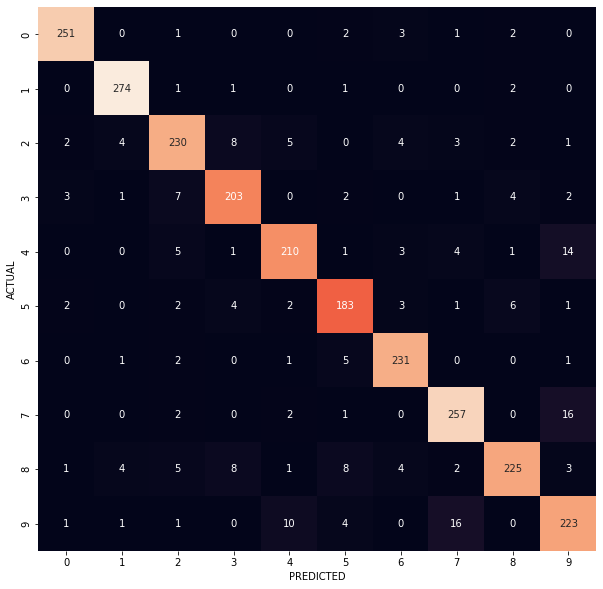

In [ ]:
cm = pd.crosstab(y_test, y_pred, rownames=["ACTUAL"], colnames=["PREDICTED"])
fig = plt.figure(figsize=(10,10))
fig = sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)